# Magnitude structure for minimizing negative transfer of knowledge in MOGP


Given a number of outputs $M=3$, each one with $Q_{\text{unique}}=3$ latent components, with $Q_{\text{pair}}=1$  pairwise components and $Q_{\text{shared}}=2$ shared components.

This leads to a total of 

\begin{align}
Q_{\text{total}} & = M * Q_u + \binom{M}{2} Q_p + Q_s \\
Q_{\text{total}} & = 3 * 3 + 3 * 1 * + 2 = 14
\end{align}

With this, a binary matrix with the weights has the form:

__TODO: make so that the parameter fix can be done to COMPONENTS and CHANNELS__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import itertools
from scipy.special import comb

import sys
sys.path.insert(0, '../')

import mogptk

In [2]:
def create_mask(M, Q_u, Q_p, Q_s):
    # total number of components
    Q = int(Q_u.sum() + Q_s + comb(M, 2) * Q_p)
    
    W = np.zeros((Q, M))

    # unique
    for i, q in enumerate(Q_u):
        if i==0:
            W[:q, i] = np.ones(q)
        else:
            aux = np.cumsum(Q_u)[i - 1]
            W[aux:aux+q, i] = np.ones(q)

    # pairwise
    if Q_p > 0:
        pairs = list(itertools.combinations(range(M), 2))

        aux = Q_u.sum()
        for p in pairs:
            W[aux:aux+Q_p, p] = np.ones(Q_p)
            aux += Q_p

    # shared
    if Q_s > 0:
        W[-Q_s:] = np.ones((Q_s, M))
    
    return W, Q

In [3]:
# channels
M = 4
# unique
Q_u = np.array([1, 1, 1, 1]) 
# pairwise
Q_p = 1
# shared
Q_s = 1 

W, _ = create_mask(M, Q_u, Q_p, Q_s)

array([5., 5., 5., 5.])

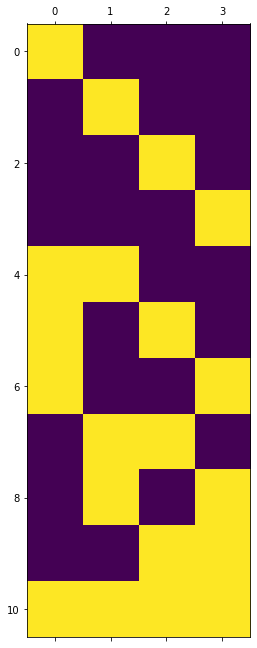

In [4]:
plt.matshow(W)
W.sum(0)

# Use mask on MOSM

In [5]:
n_points = 100
t = np.linspace(0, 6, n_points)

y1 = np.sin(6 * t)
y2 = np.sin(6 * t + 2)
y3 = np.sin(6 * t) - np.sin(4 * t)
y4 = 3 * np.sin(6 * (t - 2))

data1 = mogptk.Data(t, y1, name='A')
data2 = mogptk.Data(t, y2, name='B')
data3 = mogptk.Data(t, y3, name='C')
data4 = mogptk.Data(t, y4, name='D')

# create dataset
dataset = mogptk.DataSet(data1, data2, data3, data4)

In [6]:
# channels
M = 4
# unique
Q_u = np.array([1, 1, 1]) 
# pairwise
Q_p = 1
# shared
Q_s = 0

W, Q = create_mask(M, Q_u, Q_p, Q_s)

model = mogptk.MOSM(dataset, Q)

In [8]:
params = model.get_params()

In [19]:
np.array([p['magnitude']for p in params[:-1]])

array([[ 0.88995269, -0.84303907,  0.35598524,  0.43291051],
       [-0.76170202,  0.17857939, -0.2968727 , -0.14015862],
       [ 0.66116012,  0.68146001,  1.73743902,  1.32710558],
       [ 1.08971898, -0.38236019, -0.67710633, -0.21055198],
       [ 1.72234122,  1.92508297,  1.33887081, -1.15586968],
       [ 1.67996658, -0.01533544,  0.1615417 , -0.76185096],
       [ 1.7635527 ,  0.35322751,  0.10936746,  0.37947871],
       [ 1.90966481,  0.77209389,  0.54219039, -1.06538648],
       [ 1.07223348, -1.74186502, -0.91746637,  0.23008413]])

In [26]:
# set params
for q in range(model.Q):
    model.set_param(q, 'magnitude', W[q,:])